## Linear regression in TensorFlow with eager mode

A linear regression implemented using TensorFlow's Eager API
* Author: Gao Yang

#### Setup eager mode

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt
import numpy as np

print("Enabling eager execution...")
tfe.enable_eager_execution()
print("Eager execution status: {}".format(tf.executing_eagerly()))

/Users/Yang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Enabling eager execution...
Eager mode status: True


#### Creating training dataset

In [8]:
# train_x = [3.3, 4.4, 5.5, 6.81, 6.93, 4.20, 9.93, 6.28, 7.49, 2.17,
#          7.04, 10.9]
# train_y = [1.7, 2.76, 2.09, 3.18, 1.70, 1.90, 3.38, 2.60, 2.53, 1.22,
#          2.82, 3.46]
# --- this is Aymeric Damien's dataset, I am not satisfied with it----

# I will generate my own training dataset using numpy, as follows:
train_x = np.linspace(0, 20, 100)
true_w = 5
true_b = 10
train_y = true_w * train_x + true_b
train_y = train_y + np.random.randn(len(train_x)) * 20 # add Gauss noise

print("Training dataset is ready.")

Training dataset is ready.


#### Create model

In [9]:
num_samples = len(train_x)
learning_rate = 0.01
num_epoch = 2001

# Put W and b outside of model to prevent model function from initializing W and b in every epoch
# Initialize W and b
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

def model(inputs):
    
    # model: linear regression
    return inputs*W + b

def loss(model, inputs, labels):
    
    # loss : mean square error
    
    return tf.reduce_sum(tf.pow((model(inputs) - labels), 2)) / (2 * num_samples)

    # tf.reduce_sum : get sum
    # tf.pow(x,y)   : get x.^y

grad = tfe.implicit_gradients(loss)
    
# Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)



#### Train the model


In [10]:
# initial loss

train_loss = []

print("Initial loss: {:.3f}".format(loss(model,train_x,train_y)),
     "W = {:.9f}".format(W.numpy()),
     "b = {:.9f}".format(b.numpy()))
      
for epoch in range(num_epoch):
    
    # ------ CORE code for linear regression --------- 
    optimizer.apply_gradients(grad(model,train_x,train_y))
    
    # store loss in a list for future visualization
    train_loss.append(loss(model, train_x, train_y))
    
    # output loss, W and b
    if epoch % 50 == 0:
        print("Epoch: {:04d}, W = {:.9f}, b = {:.9f}, loss = {:.3f}".format(epoch,
                                                                           W.numpy(),
                                                                           b.numpy(),
                                                                           loss(model, train_x, train_y)))

print('\n')
print("        True W = {:.9f}, b = {:.9f}".format(true_w, true_b))
    

Initial loss: 965.604 W = 2.438246489 b = -0.762197971
Epoch: 0000, W = 6.921221733, b = -0.398371428, loss = 305.607
Epoch: 0050, W = 5.664506435, b = 0.852228045, loss = 211.352
Epoch: 0100, W = 5.576405525, b = 2.030619383, loss = 208.559
Epoch: 0150, W = 5.498760700, b = 3.069153070, loss = 206.390
Epoch: 0200, W = 5.430331230, b = 3.984429598, loss = 204.705
Epoch: 0250, W = 5.370023727, b = 4.791074753, loss = 203.396
Epoch: 0300, W = 5.316872597, b = 5.501985073, loss = 202.380
Epoch: 0350, W = 5.270030499, b = 6.128521919, loss = 201.590
Epoch: 0400, W = 5.228747845, b = 6.680696964, loss = 200.977
Epoch: 0450, W = 5.192364693, b = 7.167336941, loss = 200.501
Epoch: 0500, W = 5.160299301, b = 7.596220493, loss = 200.131
Epoch: 0550, W = 5.132040024, b = 7.974201679, loss = 199.843
Epoch: 0600, W = 5.107134819, b = 8.307321548, loss = 199.620
Epoch: 0650, W = 5.085185528, b = 8.600905418, loss = 199.447
Epoch: 0700, W = 5.065841198, b = 8.859643936, loss = 199.312
Epoch: 0750, W

#### Draw dataset points and regression line

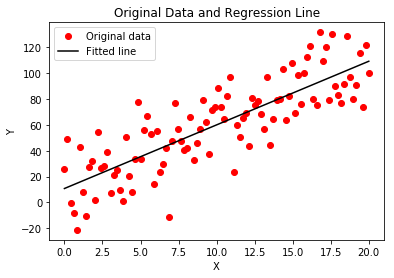

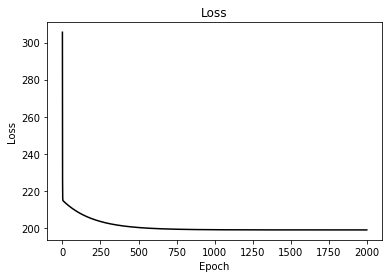

In [11]:
plt.plot(train_x, train_y, 'ro', label = 'Original data')
plt.plot(train_x, np.array(model(train_x)), 'k', label = 'Fitted line')
plt.title('Original Data and Regression Line')
plt.legend()
plt.xlabel('X'),plt.ylabel('Y')
plt.show()

plt.plot(train_loss,'k')
plt.title('Loss')
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()